In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

In [160]:
df = pd.read_csv("iris.csv") # Read a CSV
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [161]:
df.tail(5) #last 5

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [162]:
df.head(5) #first 5

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [163]:
df.shape #(rows,columns)

(150, 5)

In [164]:
df.dtypes
# now you know we have float64 and object as types

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [165]:
cols = list(df.columns) # getting all the col names and converting to a list
print("All the numerical data") 
for x in cols:
    if df[x].dtype == "float64": # checking if it is float64 as we saw above
        print(x)
print()
print("All the catagorical data")
for x in cols:
    if df[x].dtype == "object": #checking if it is a object
        print(x)


All the numerical data
sepal.length
sepal.width
petal.length
petal.width

All the catagorical data
variety


In [166]:
cols = list(df.columns) # getting all the col names and converting to a list
print("All the numerical data") 
print("++++++++++++++++")
for x in cols:
    if df[x].dtype == "float64":
        print(x)
        print(f"Min: {df[x].min()}") # same as above just finding min max and mode
        print(f"Max: {df[x].max()}")
        print(f"Mode: {df[x].mode()[0]}")
        print("-------------------")

All the numerical data
++++++++++++++++
sepal.length
Min: 4.3
Max: 7.9
Mode: 5.0
-------------------
sepal.width
Min: 2.0
Max: 4.4
Mode: 3.0
-------------------
petal.length
Min: 1.0
Max: 6.9
Mode: 1.4
-------------------
petal.width
Min: 0.1
Max: 2.5
Mode: 0.2
-------------------


In [167]:
# to check null values we will need to tamper with the data
df["sepal.length"][0] = None
df["sepal.width"][0] = None

/tmp/ipykernel_29201/113008087.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["sepal.length"][0] = None
/tmp/ipykernel_29201/113008087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [168]:
for x in cols:
    num_of_null = df[x].isnull().sum()
    if num_of_null > 0:
        print(x,"has some null values")

sepal.length has some null values
sepal.width has some null values


In [169]:
# just to bring back the df to original form 
df = pd.read_csv("iris.csv")

In [170]:
# creating some outliers
df["sepal.length"][0] = 10.0

/tmp/ipykernel_29201/3518555621.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["sepal.length"][0] = 10.0
/tmp/ipykernel_29201/3518555621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9a1e0b6410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9a1e197210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9a1eb85110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9a1e24d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9a1e07f110>],
 'means': []}

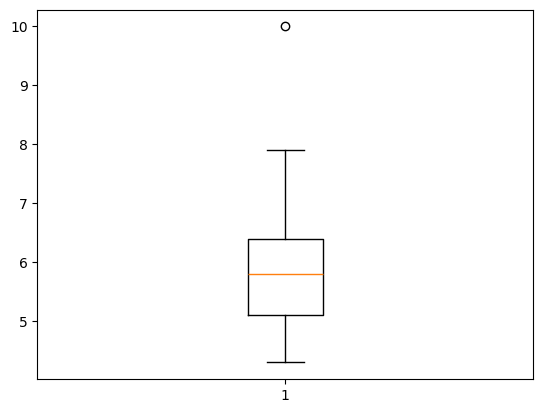

In [171]:
plt.boxplot(df["sepal.length"])

In [ ]:
df.describe() # this can give you 5 number summary

In [172]:
# give an arr, threshold get the list of outliers as return
def z_score_outliers(data,threshold):
    outlier = []
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i-mean)/std
        if z > threshold:
            outlier.append(i)
    return outlier


In [173]:
z_score_outliers(df["sepal.length"],3)

[10.0]

In [174]:
# just to bring back the df to original form 
df = pd.read_csv("iris.csv")

In [175]:
numerical_col = []
for x in cols:
    if df[x].dtype !="object":
        numerical_col.append(x)


In [176]:
# to check each corelations
results = {}
for x in numerical_col:
    for y in numerical_col:
        if x!=y:
            if (y,x) not in results: # To remove repitations
                a = (x,y)
                results[a]=df[x].corr(df[y])
print(results)

{('sepal.length', 'sepal.width'): -0.11756978413300208, ('sepal.length', 'petal.length'): 0.8717537758865831, ('sepal.length', 'petal.width'): 0.8179411262715757, ('sepal.width', 'petal.length'): -0.4284401043305394, ('sepal.width', 'petal.width'): -0.36612593253643927, ('petal.length', 'petal.width'): 0.9628654314027961}


In [177]:
for x in results:
    if results[x] > 0:
        print(f"{x} has positive corr")
    elif results[x] < 0:
        print(f"{x} has negitive corr")
    elif results[x] == 0:
        print(f"{x} has no corr")

('sepal.length', 'sepal.width') has negitive corr
('sepal.length', 'petal.length') has positive corr
('sepal.length', 'petal.width') has positive corr
('sepal.width', 'petal.length') has negitive corr
('sepal.width', 'petal.width') has negitive corr
('petal.length', 'petal.width') has positive corr


sepal.length 0.3117530585022963
sepal.width 0.31576710633893473
petal.length -0.2721276664567214
petal.width -0.10193420656560036


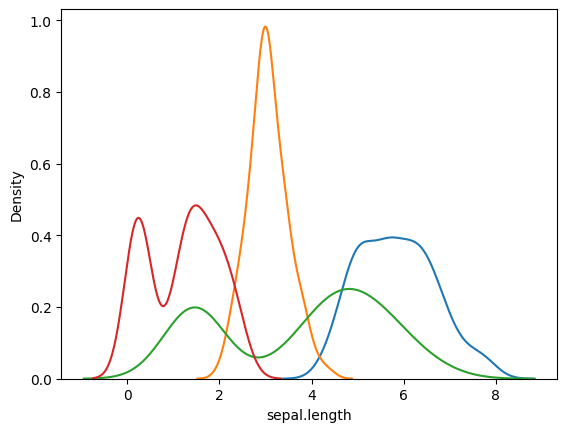

In [178]:
# (-0.5, 0.5) — low or approximately symmetric.
# (-1, -0.5) U (0.5, 1) — moderately skewed.
# Beyond -1 and 1 — Highly skewed.
for x in numerical_col:
    print(x,skew(df[x])) 
    sns.kdeplot(df[x])

<BarContainer object of 3 artists>

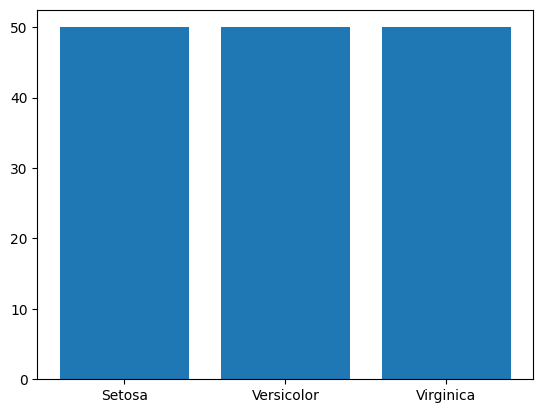

In [179]:
variety =  df['variety']
data = variety.value_counts()
names = list(data.index)
values = list(data)
plt.bar(names,values)


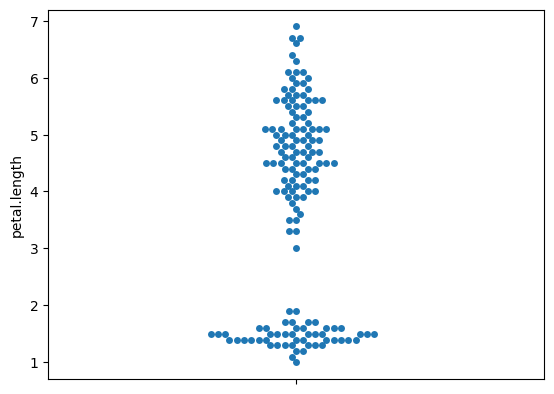

In [180]:
a = sns.swarmplot(df['petal.length'])
plt.show(a)

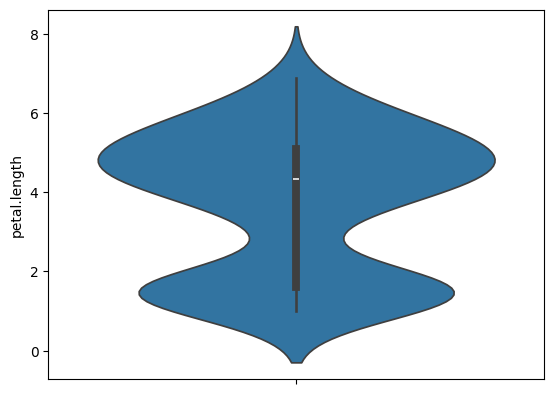

In [181]:
a = sns.violinplot(df['petal.length'])
plt.show(a)

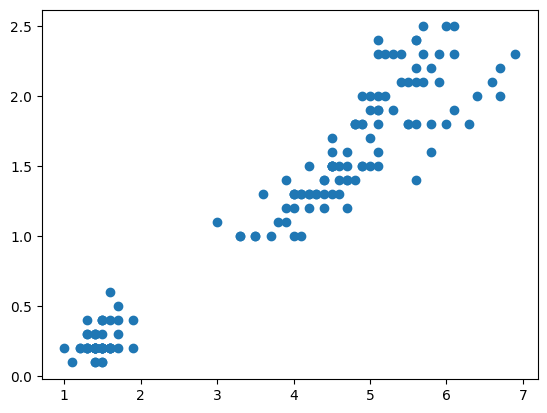

In [182]:
plt.scatter(df['petal.length'],df['petal.width'])

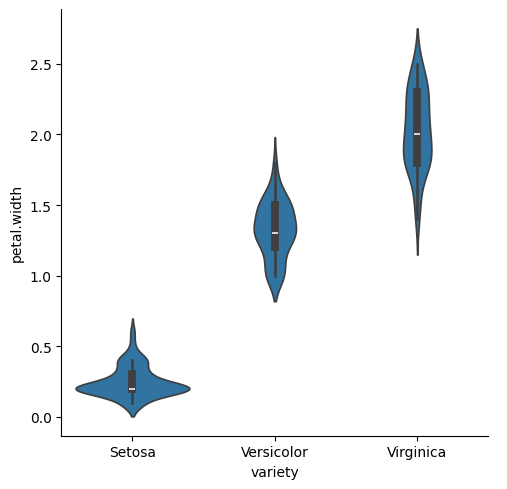

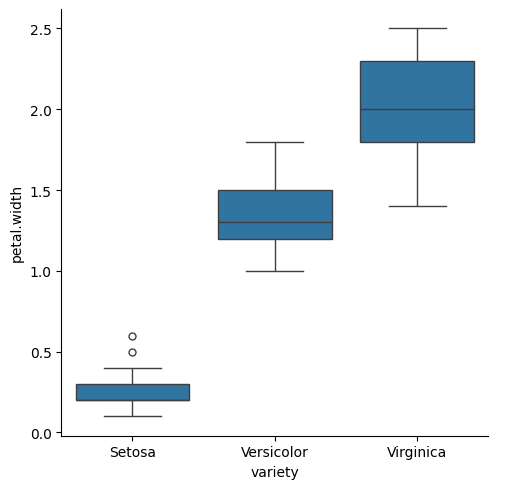

In [186]:
# cat plot is used to make voilen and box plot u can make it directly also and also by calling cat plot 

a = sns.catplot(x="variety",y="petal.width",kind="violin",data=df)
a = sns.catplot(x="variety",y="petal.width",kind="box",data=df)


<Axes: xlabel='variety', ylabel='count'>

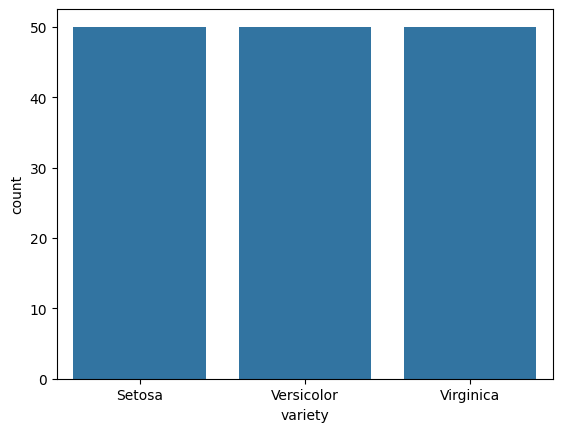

In [188]:
sns.countplot(x='variety',data=df) # its the same as we did some time aboce taking the name and values and putting it in bar graph

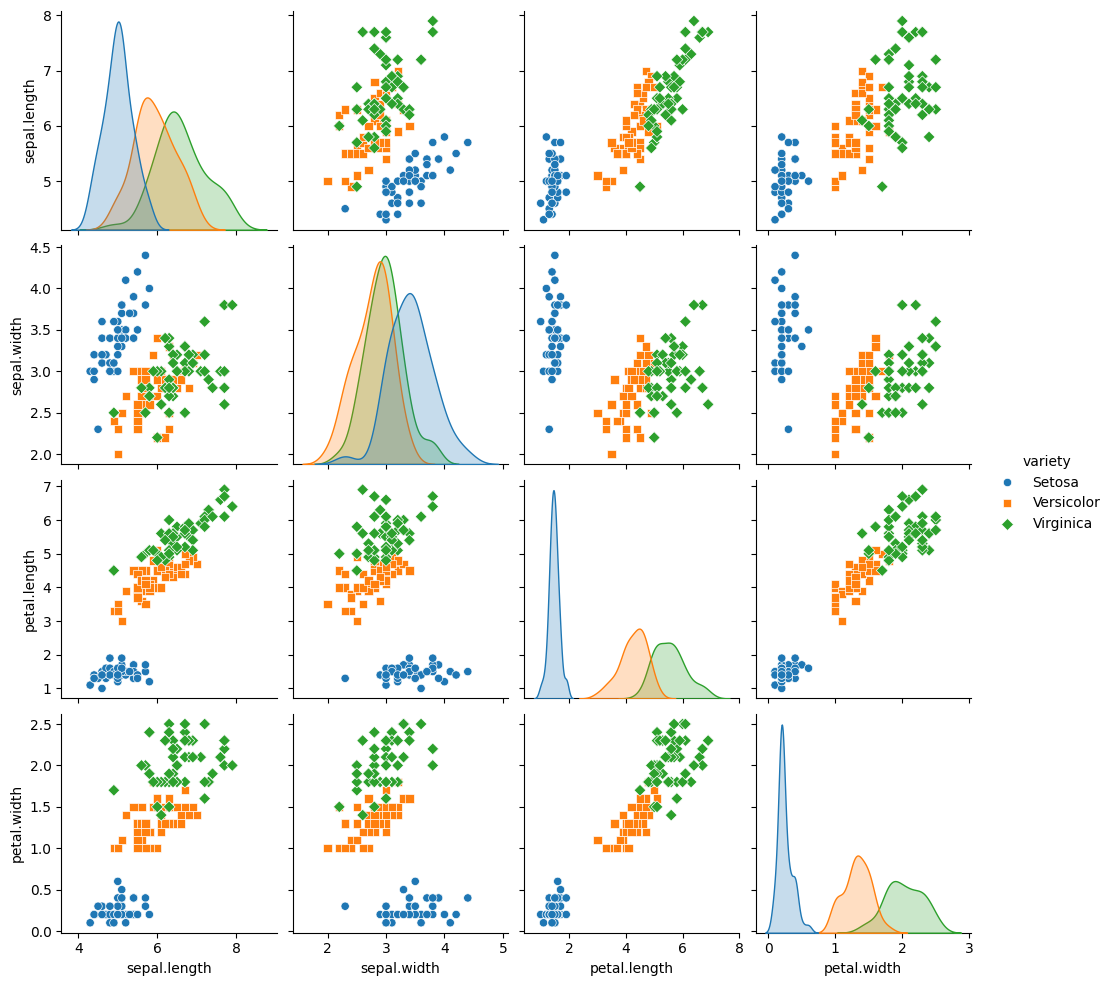

In [192]:
sns.pairplot(df,hue='variety', markers=["o","s","D"])